In [26]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [27]:
def DTWDistance(s1, s2):
    DTW={}
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0
    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return math.sqrt((DTW[len(s1)-1, len(s2)-1])/(len(s1)*len(s2)))
def compute_euclidean_distance_matrix(x, y) -> np.array:
    """Calculate distance matrix
    This method calcualtes the pairwise Euclidean distance between two sequences.
    The sequences can have different lengths.
    """
    dist = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            dist[i,j] = (x[j]-y[i])**2
    return dist
def compute_accumulated_cost_matrix(x, y) -> np.array:
    """Compute accumulated cost matrix for warp path using Euclidean distance
    """
    distances = compute_euclidean_distance_matrix(x, y)
    # Initialization
    cost = np.zeros((len(y), len(x)))
    cost[0,0] = distances[0,0]
    for i in range(1, len(y)):
        cost[i, 0] = distances[i, 0] + cost[i-1, 0]  
    for j in range(1, len(x)):
        cost[0, j] = distances[0, j] + cost[0, j-1]  
    # Accumulated warp path cost
    for i in range(1, len(y)):
        for j in range(1, len(x)):
            cost[i, j] = min(
                cost[i-1, j],    # insertion
                cost[i, j-1],    # deletion
                cost[i-1, j-1]   # match
            ) + distances[i, j] 
    return cost

def euclidean_dist(s1,s2):
    dist = np.sqrt(np.mean((s1-s2)**2));
    return dist

/Users/tanviranjan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


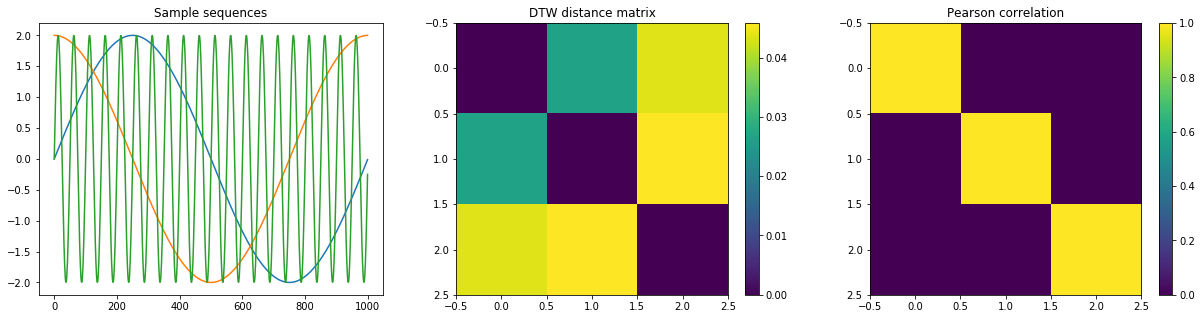

Corr between DTW and pearson correlation between time-series: -0.9324533707448415


In [47]:
x=np.arange(0,10,0.01); 
s=np.zeros(shape=(len(x),3));
s[:,0]=2*np.sin(2*math.pi*0.1*x); s[:,1]=2*np.cos(2*math.pi*0.1*x); s[:,2] = 2*np.sin(2*math.pi*2*x)

f=plt.figure(figsize=(21,5))
for i in range(3):
    plt.subplot(131); plt.plot(s[:,i]);
plt.title('Sample sequences');    

dtw,euc = [np.zeros(shape=(3,3)) for _ in range(2)]
for i in range(3):
    for j in range(3):
        dtw[i,j] = DTWDistance(s[:,i],s[:,j]); euc[i,j] = stats.pearsonr(s[:,i],s[:,j])[0];#euclidean_dist(s[:,i],s[:,j]);
        #print(f'DTW score: {DTWDistance(s[:,i],s[:,j]):0.4f}, Euclidean dist: {euclidean_dist(s[:,i],s[:,j]):0.4f}')
        
        
plt.subplot(132); plt.imshow(dtw); plt.colorbar(); plt.title('DTW distance matrix')
plt.subplot(133); plt.imshow(euc); plt.colorbar(); plt.title('Pearson correlation');

plt.savefig('Figures/DTW_corr.png')
plt.show();


corr_dtw_corr = stats.pearsonr(dtw.flatten(), euc.flatten());
print(f'Corr between DTW and pearson correlation between time-series: {corr_dtw_corr[0]}')


In [34]:
euc.flatten()

array([ 1.00000000e+00,  2.27445287e-17, -1.57717535e-17,  2.27445287e-17,
        1.00000000e+00,  5.28006458e-17, -1.57717535e-17,  5.28006458e-17,
        1.00000000e+00])

In [46]:
print(f'Correlation between DTW and pearson: {stats.pearsonr(euc.flatten(),dtw.flatten())}');


Correlation between DTW and pearson: (-0.9324533707448415, 0.0002467625234594318)
